# Clustering Crypto

In [59]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [60]:
# Load the crypto_data.csv dataset.
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [61]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df.loc[crypto_df['IsTrading']==True]
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   IsTrading        1144 non-null   bool   
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 54.7+ KB


In [62]:
# Keep all the cryptocurrencies that have a working algorithm.
nan_values = crypto_df[crypto_df['Algorithm'].isna()]
print(nan_values)

Empty DataFrame
Columns: [CoinName, Algorithm, IsTrading, ProofType, TotalCoinsMined, TotalCoinSupply]
Index: []


In [63]:
# Remove the "IsTrading" column. 
crypto_df=crypto_df.drop("IsTrading",axis=1)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   ProofType        1144 non-null   object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(4)
memory usage: 53.6+ KB


In [64]:
# Remove rows that have at least 1 null value.
crypto_df=crypto_df.dropna()
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [65]:
# Keep the rows where coins are mined.
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined']>0]
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [66]:
# Create a new DataFrame that holds only the cryptocurrencies names.
names_df = crypto_df[["CoinName"]]
names_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [67]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df=crypto_df.drop(['CoinName'],axis=1)
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [68]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [70]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
df_pca=pca.fit_transform(X)
df_pca

array([[-1.16293397e+10, -5.50257435e+08,  8.14727798e-01],
       [-1.06408764e+10, -1.19785243e+09,  8.14483672e-01],
       [ 2.75050695e+11,  1.31237019e+11,  9.89919327e-01],
       ...,
       [-9.92656677e+09, -6.98661475e+08, -7.41975180e-01],
       [-1.16075059e+10, -5.46071504e+08, -7.13006715e-01],
       [-1.16284097e+10, -5.49868345e+08,  2.25068679e-01]])

In [71]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    df_pca, columns=["PC 1", "PC 2", "PC 3"], index=crypto_df.index)
pcs_df.head()

,PC 1,PC 2,PC 3
42,-1.162934e+10,-5.502574e+08,0.814728
404,-1.064088e+10,-1.197852e+09,0.814484
1337,2.750507e+11,1.312370e+11,0.989919
BTC,-1.160219e+10,-5.552767e+08,-0.712858
ETH,-1.157548e+10,-6.435026e+08,-0.706031


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\nisha\anaconda3\envs\hope\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



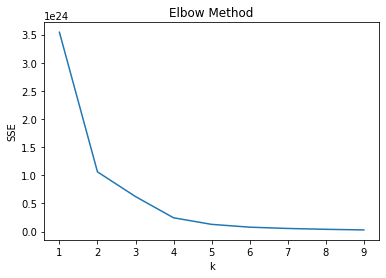

In [72]:
# Create an elbow curve to find the best value for K.
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(pcs_df)
    sse[k]= kmeanmodel.inertia_
from matplotlib import pyplot as plt
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# inertia 

Running K-Means with `k=4`

In [73]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
y_pred = model.predict(pcs_df)
print(y_pred)

[0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [74]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = crypto_df.join(pcs_df, how='inner')
clustered_df.head()
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = clustered_df.join(names_df, how='inner')
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-1.162934e+10,-5.502574e+08,0.814728,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-1.064088e+10,-1.197852e+09,0.814484,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.750507e+11,1.312370e+11,0.989919,EliteCoin,3
BTC,SHA-256,PoW,1.792718e+07,21000000,-1.160219e+10,-5.552767e+08,-0.712858,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-1.157548e+10,-6.435026e+08,-0.706031,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-1.152507e+10,-5.628276e+08,-0.574821,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-1.160577e+10,-5.470735e+08,0.773963,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-1.162074e+10,-5.651521e+08,-0.696025,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-1.139080e+10,-5.433762e+08,-0.705865,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-1.160746e+10,-5.461464e+08,-0.713007,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [75]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [76]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined","Class"], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [77]:
# Print the total number of tradable cryptocurrencies.
print(f" There are {len(clustered_df)} tradable cryptocurrencies.")

 There are 532 tradable cryptocurrencies.


In [78]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_scaled = MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])
clustered_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [79]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
novice_scaled_df = pd.DataFrame((clustered_scaled), index=clustered_df.index, columns=["TotalCoinSupply", "TotalCoinsMined"])
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
novice_scaled_df["CoinName"] = clustered_df["CoinName"]
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
novice_scaled_df["Class"] = clustered_df["Class"]
novice_scaled_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,3
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [82]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
novice_scaled_df.hvplot.scatter(
    x="TotalCoinsMined", 
    y="TotalCoinSupply", 
    by="Class", 
    hover_cols=["CoinName"]
)


NameError: name 'noivce_scaled' is not defined

In [83]:
novice_scaled_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", hover_cols=["CoinName"])


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)

In [84]:

# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data=clustered_df_scaled, columns=["TotalCoinSupply", "TotalCoinsMined"], index = clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = clustered_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = clustered_df["Class"]

plot_df.head(10)

NameError: name 'clustered_df_scaled' is not defined